In [1]:
from ROOT import gRandom
import numpy as np
import ROOT


Welcome to JupyROOT 6.18/04


In [2]:
def f(x, p):
    return p[0]*(1 / (x[0]**2 + 1) + 1 + x[0])

In [3]:
a = -1
b = 1
n_count = 2000

In [5]:
def Neyman(a, b, n_count, f, x_values):
    
    max_f = np.max([f(x,[1,]) for x in x_values])
    while True:
        e = gRandom.Uniform(0, 1)
        n = gRandom.Uniform(0, 1)
        r = (b-a)*e + a
        r_value = [r,]
        m = max_f*n
        if m <= f(r_value, [1,]):
            return r
    

In [6]:
random_values = np.arange(n_count, dtype = np.float32)

In [7]:
x_values = np.linspace(a, b, n_count).reshape(-1,1)

ROOT.sw = ROOT.TStopwatch()
ROOT.sw.Start()

for i in range (n_count):
    random_values[i] = Neyman(a, b, n_count, f, x_values)
ROOT.sw.Stop()
ROOT.sw.Print()


Real time 0:00:10, CP time 10.740


In [8]:
random_values.mean(), random_values.std()

(0.20185663, 0.52880365)

In [9]:
from ROOT import TH1F, TCanvas

In [10]:
hist = TH1F("hist", "Histogram", 30, -1, 1)


In [11]:
for i in range(n_count):
    hist.Fill(random_values[i])

In [12]:
c1 = TCanvas("c1", "Histogram", 500, 500)

In [13]:
c1.DrawFrame(-1,0,1,500);


In [14]:
from ROOT import TF1

In [15]:
f1 = TF1("f", f, -1, 1, 1)
f1.SetParameter(0,1)

In [16]:
hist.Draw("SAME")
f1.Draw("SAME")

In [17]:
#hist.Fit(f1, "R1")

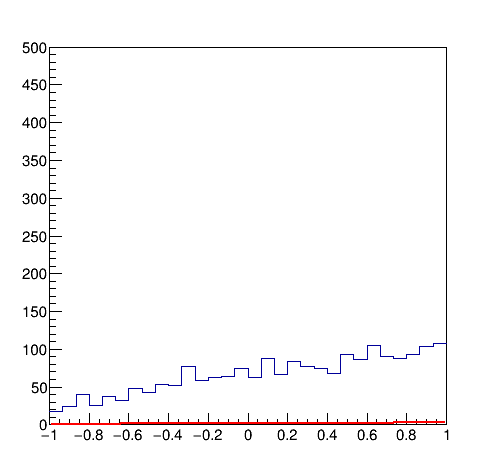

In [18]:
c1.Draw()

In [19]:
def g1(x,p):
    return (2 / np.pi) * (1 / (1 + x[0]**2)) * p[0]


In [20]:
def g2(x, p):
    return ((1 + x[0])*2/(4 + np.pi)) * p[0]

In [21]:
a_1 = np.pi / (np.pi + 4)
a_2 = 4 / (np.pi + 4) 
a_2

0.5600991535115574

In [22]:
def composition_method(p):
    xi = gRandom.Uniform(0, 1)
    success = gRandom.Binomial(1, p)
    if success == 0:
        return np.tan((xi -1)*np.pi)
    else:
        return -1 + 4*np.sqrt(xi)

In [23]:
n_count = 100000

In [24]:
p = a_2 
random_values2 = np.arange(n_count, dtype = np.float32)

x_values = np.linspace(a, b, n_count).reshape(-1,1)

ROOT.sw = ROOT.TStopwatch()
ROOT.sw.Start()

for i in range (n_count):
    random_values2[i] = composition_method(p)
    
    
ROOT.sw.Stop()
ROOT.sw.Print()


Real time 0:00:00, CP time 0.350


In [25]:
hist2 = TH1F("hist2", "Histogram2", 30, -1, 1)

In [26]:
for i in range(n_count):
    hist2.Fill(random_values2[i])

In [27]:
random_values.mean(), random_values.std()

(0.20185663, 0.52880365)

In [28]:
c2 = TCanvas("c2", "Histogram2", 500, 500)

In [29]:

c2.DrawFrame(-1,0,1,2000);

In [30]:

hist2.Draw("SAME")

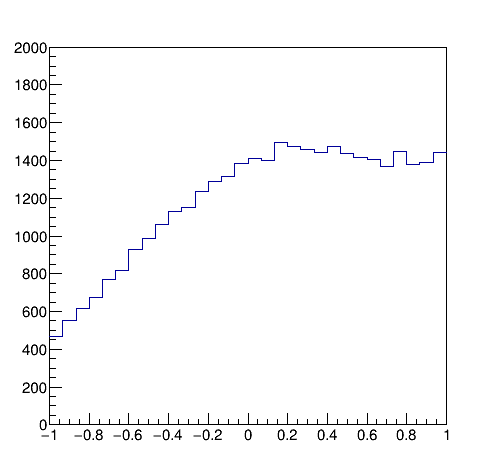

In [31]:
c2.Draw()